⚠️ Waarschuwing: test.wav bestaat al en zal worden overschreven.
🎤 Start opname...
🛑 Opname gestopt.
⚠️ Waarschuwing: Clipping gedetecteerd! Het opgenomen geluid is mogelijk vervormd.


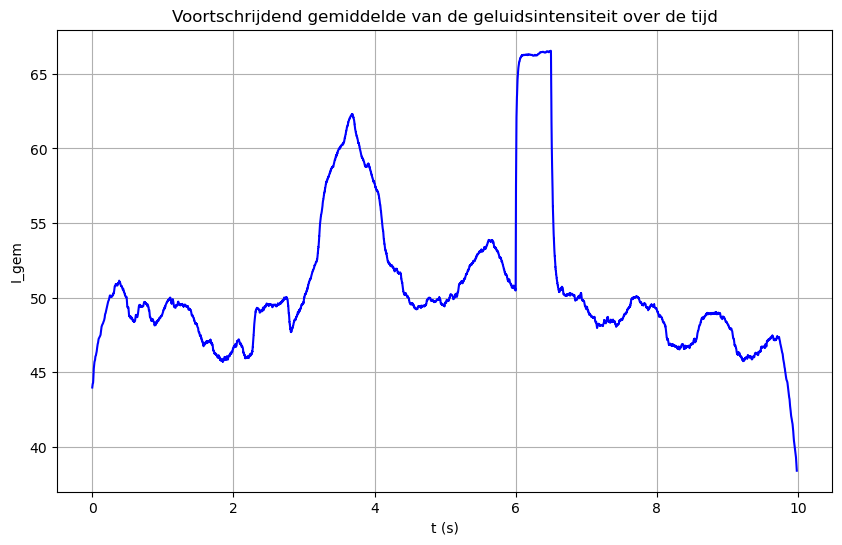

44100 9.984580498866213


In [3]:
import pyaudio
import wave
import os
import numpy as np

# Audioconfiguratie
Chunk = 1024  # Aantal frames per buffer (verkleint geheugenbelasting)
Format = pyaudio.paInt16  # 16-bit audioformaat (standaard voor veel toepassingen)
Rate = 44100  # Samplefrequentie in Hz (CD-kwaliteit)
seconds = 10  # Totale opnameduur in seconden
output_file = "test.wav"  # Naam van het uitvoerbestand
Channels = 1  # Mono-opname (voor eenvoudiger verwerking)

# Controleer of het bestand al bestaat en waarschuw de gebruiker
if os.path.exists(output_file):
    print(f"⚠️ Waarschuwing: {output_file} bestaat al en zal worden overschreven.")
    
# Initialiseer PyAudio en start opname
p = pyaudio.PyAudio()
stream = p.open(format=Format, channels=Channels, rate=Rate, input=True, frames_per_buffer=Chunk)

print("🎤 Start opname...")
frames = []  # Opslag voor audioblokken
clipping_detected = False  # Vlag voor detectie van oversturing

# Lees de audioblokken en sla ze op
for _ in range(int(Rate / Chunk * seconds)):
    data = stream.read(Chunk)
    frames.append(data)

    # Controleer op clipping (oversturing)
    audio_array = np.frombuffer(data, dtype=np.int16)
    if np.any(audio_array >= 32767) or np.any(audio_array <= -32768):
        clipping_detected = True
    
print("🛑 Opname gestopt.")
stream.stop_stream()
stream.close()
p.terminate()

# Opslaan als WAV-bestand
with wave.open(output_file, 'wb') as wf:
    wf.setnchannels(Channels)
    wf.setsampwidth(p.get_sample_size(Format))
    wf.setframerate(Rate)
    wf.writeframes(b''.join(frames))

# Geef feedback over mogelijke vervorming
if clipping_detected:
    print("⚠️ Waarschuwing: Clipping gedetecteerd! Het opgenomen geluid is mogelijk vervormd.")
else:
    print("✅ Geen clipping gedetecteerd.")

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Stel hier de lengte van het tijdsinterval in
tijdsinterval = 0.5

# Inlezen van het .wav bestand
sampling_rate, audio_data = wavfile.read(output_file)

# Tijd-array maken
duration = len(audio_data) / sampling_rate
time = np.linspace(0., duration, len(audio_data))

# Bepaal de grootte van het tijdsinterval bij het voortschrijdend gemiddelde
window_size = int(tijdsinterval * sampling_rate)  # Aantal samples in het tijdsinterval

# Bereken het voortschrijdend gemiddelde van de absolute waarde van de amplitude
rolling_avg = np.convolve(np.abs(audio_data), np.ones(window_size)/window_size, mode='same')
db = 20*np.log10(rolling_avg)/0.78

# Grafiek plotten
plt.figure(figsize=(10, 6))
plt.plot(time, db, color='blue')
plt.title('Voortschrijdend gemiddelde van de geluidsintensiteit over de tijd')
plt.xlabel('t (s)')
plt.ylabel('I_gem')
plt.grid(True)
plt.show()
print(sampling_rate,duration)

6.52559305140755 6.498336753678774
0.16353778637265748 3


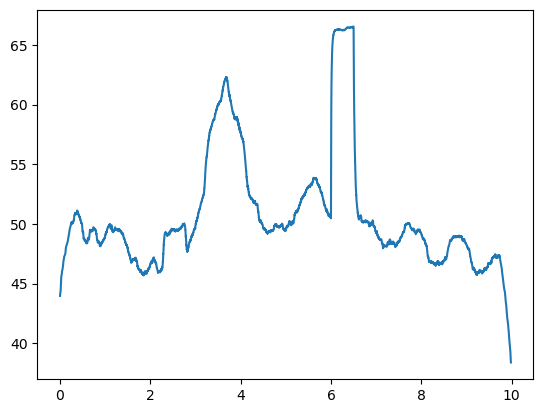

In [5]:

import matplotlib.pyplot as plt
from scipy.io import wavfile

# Stel hier de lengte van het tijdsinterval in
tijdsinterval = 0.5
nulmeting = 53

# Inlezen van het .wav bestand
sampling_rate, audio_data = wavfile.read(output_file)

# Tijd-array maken
duration = len(audio_data) / sampling_rate
time = np.linspace(0., duration, len(audio_data))

# Bepaal de grootte van het tijdsinterval bij het voortschrijdend gemiddelde
window_size = int(tijdsinterval * sampling_rate)  # Aantal samples in het tijdsinterval

# Bereken het voortschrijdend gemiddelde van de absolute waarde van de amplitude
rolling_avg = np.convolve(np.abs(audio_data), np.ones(window_size)/window_size, mode='same')
db = 20*np.log10(rolling_avg)/0.78

# piek, index van de piek en starttijd bepalen
dbpeak = max(db)
dbpeakindex = np.argmax(db)
tbegin = time[dbpeakindex]
#waardes om de nagalmtijd te berekenen
waardelijst = [60,30,20,10]
#kijkt welke waarde kan (zo hoog mogelijk)
for i,x in enumerate(waardelijst):
    if(dbpeak-x>nulmeting+1):
        breakvalue= dbpeak-x
        a = i
        break
    
#berekenen van de nagalmtijd
for i,x in enumerate(db):
    if(i>dbpeakindex and x<breakvalue):
        if(a==0):
            nagalmtijd = time[i]-tbegin
            print(time[i],tbegin)
            break
        elif(a==1):
            nagalmtijd= (time[i]-tbegin)*2
            print(time[i],tbegin)
            break
        elif(a==2):
             nagalmtijd= (time[i]-tbegin)*3
             print(time[i],tbegin)
             break
        elif(a==3):
            nagalmtijd= (time[i]-tbegin)*6
            print(time[i],tbegin)
            break
print(nagalmtijd,a)
#plotten van grafiek
plt.plot(time,db)
plt.show()